In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel('titanic3.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [ ]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


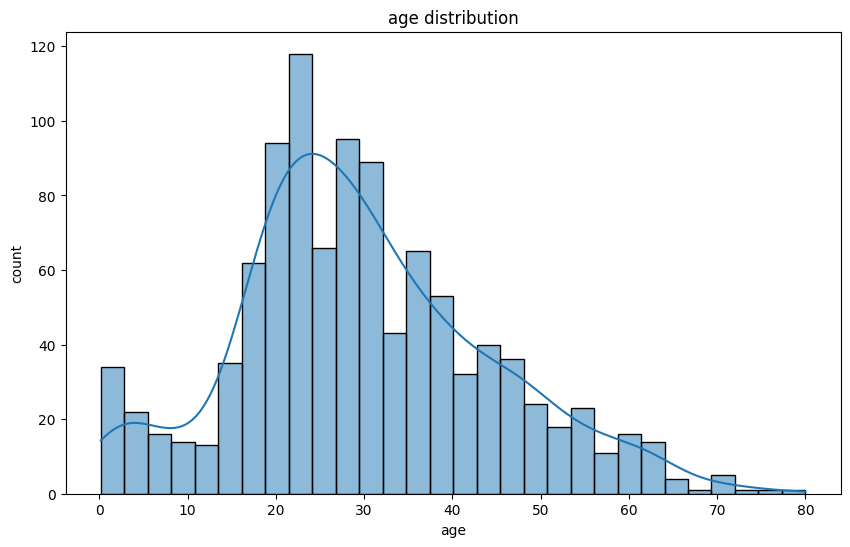

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

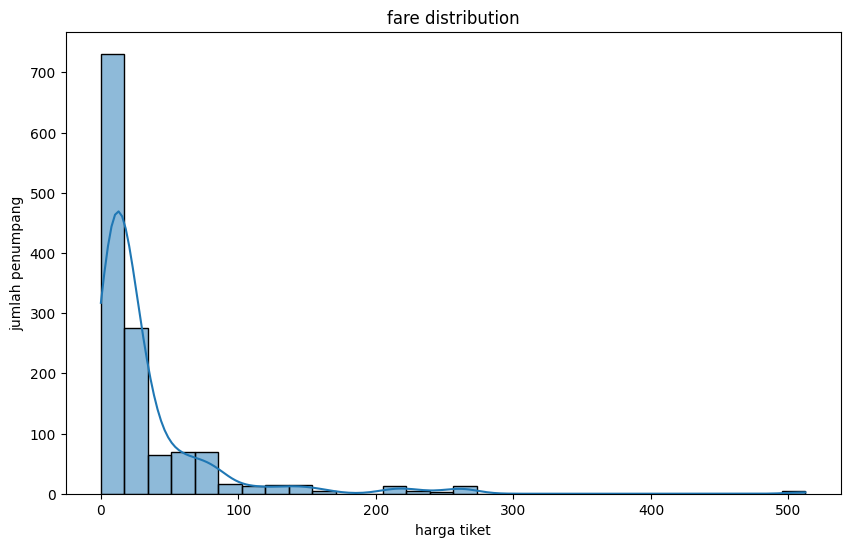

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('fare distribution')
plt.xlabel('harga tiket')
plt.ylabel('jumlah penumpang')
plt.show()

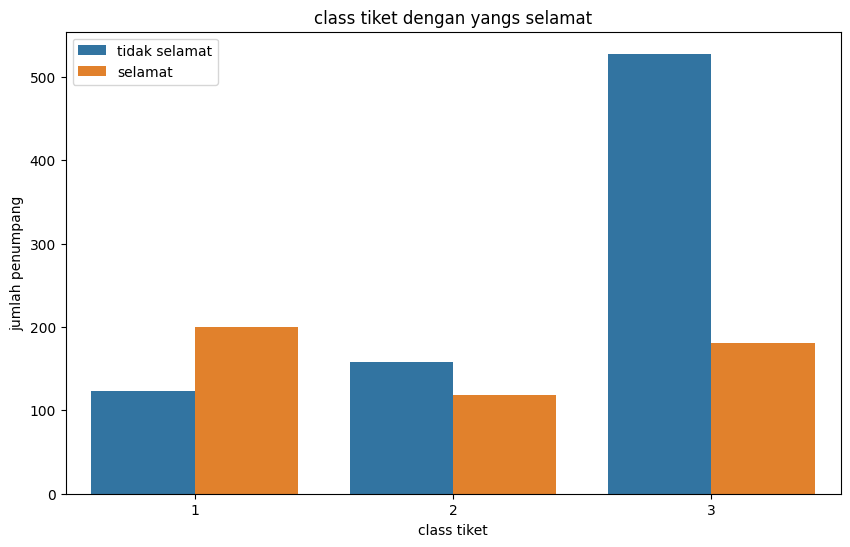

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='pclass', hue='survived',data=df)
plt.title('class tiket dengan yang selamat')
plt.xlabel('class tiket')
plt.ylabel('jumlah penumpang')
plt.legend(['tidak selamat', 'selamat'])
plt.show()

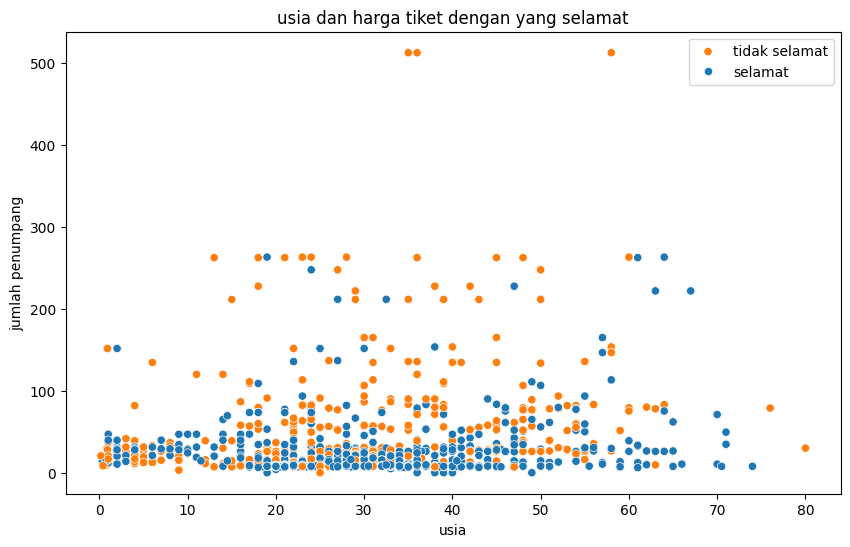

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='fare', hue='survived',data=df)
plt.title('usia dan harga tiket dengan yang selamat')
plt.xlabel('usia')
plt.ylabel('jumlah penumpang')
plt.legend(['tidak selamat', 'selamat'])
plt.show()

In [ ]:
print(df['sex'].unique())

['female' 'male']


In [ ]:
print(df['embarked'].unique())

['S' 'C' nan 'Q']


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
irrelevant_columns = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']
df = df.drop(irrelevant_columns, axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [ ]:
df['fare'].fillna(df['fare'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

<ipython-input-39-a91b811fbf13>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fare'].fillna(df['fare'].median(), inplace=True)
<ipython-input-39-a91b811fbf13>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
print(df.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [ ]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,S
1,1,1,1,0.9167,1,2,151.5500,S
2,1,0,0,2.0000,1,2,151.5500,S
3,1,0,1,30.0000,1,2,151.5500,S
4,1,0,0,25.0000,1,2,151.5500,S


In [ ]:
scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,0.361169,0,0,0.412503,S
1,1,1,1,0.009395,1,2,0.295806,S
2,1,0,0,0.022964,1,2,0.295806,S
3,1,0,1,0.373695,1,2,0.295806,S
4,1,0,0,0.311064,1,2,0.295806,S


<function matplotlib.pyplot.show(close=None, block=None)>

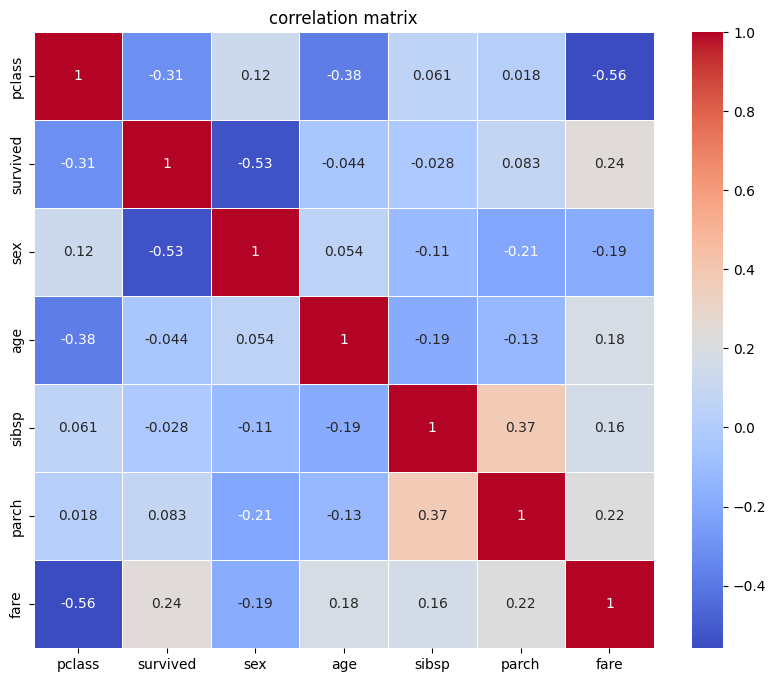

In [ ]:
numerical_data = df.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation matrix')
plt.show

In [ ]:
x = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("jumlah data train", len(X_train))
print("jumlah data test", len(X_test))

jumlah data train 1047
jumlah data test 262


In [ ]:
print("distribusi data training")
print(y_train.value_counts())

distribusi data training
survived
0    665
1    382
Name: count, dtype: int64
